<a href="https://colab.research.google.com/github/Neel1097/Mnist-Tensorflow/blob/master/Handwriting_Digit_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **All Import**
All required import made here.

In [0]:
#All Import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt

# **Loading Data**
Dataset is loaded from tensorflow database and it is categorized by trainng set and testing set.In each set two types of data is present i.e images and its label.

In [0]:
#Loading
data = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = data.load_data()

In [46]:
#Length of data set
print('Train Set->', len(training_images))
print('Test Set->', len(test_images))

Train Set-> 60000
Test Set-> 10000


# **Verfying Data**
Data i.e loading is checked and verified.

Label is  3
3
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 

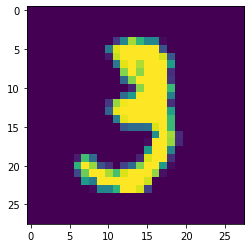

In [47]:
#Verifying
##For Training Image No. 100
plt.imshow(training_images[10])
print('Label is ',training_labels[10])
print(training_labels[10])
print(training_images[10])
##Printing All Data From 0-10
print(training_images[0:10])

Label is  0
0
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  61   3  42 118 193 118 118
   61   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  14 179 245 236 242 254 254 254 254
  245 235  84   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 151 254 254 254 213 192 178 178 180
  254 254 241  46   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  43 235 254 226  64  28  12   0   0   2
  128 252 255 173  17   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  56 254 253 107 

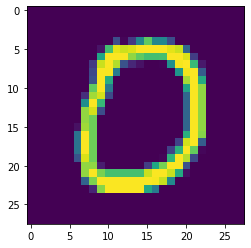

In [48]:
#For Test Image No. 10
plt.imshow(test_images[10])
print('Label is ',test_labels[10])
print(test_labels[10])
print(test_images[10])

# **Rescaling Images for the model**
Dataset should be rescaled or reshaped for proper insertion into the model.

In [0]:
#Rescaling
training_images=training_images.reshape(60000, 28, 28, 1)
training_images  = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

# **Training Model**


In [50]:
#Training
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               409728    
_________________________________________________________________
dense_22 (Dense)             (None, 10)               

# **Compling And Fitting**


In [51]:
#Compling & Fitting
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['acc'])
model.fit(training_images,
          training_labels,
          epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.1133 - acc: 0.9653
Epoch 2/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0384 - acc: 0.9875
Epoch 3/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0268 - acc: 0.9917
Epoch 4/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0181 - acc: 0.9938
Epoch 5/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0136 - acc: 0.9958
Epoch 6/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0100 - acc: 0.9969
Epoch 7/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0094 - acc: 0.9968
Epoch 8/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0084 - acc: 0.9972
Epoch 9/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0067 - acc: 0.9977
Epoch 10/10
60000/60000 [==============================] 

# **Evaluating**
Checking the trained model with the help of test set.

In [53]:
#Evaluating
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 65us/sample - loss: 0.0393 - acc: 0.9914


[0.0393362376278444, 0.9914]